In [1]:
# import necessary modules
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import house_sales_data as hsd

In [2]:
## Sacramento house price data; load
data = hsd.house_sales_data() 
print(data.keys())

## Get the target (i.e., price) and two features
price = data['price']
area = data['area']
beds = data['beds']

dict_keys(['price', 'area', 'beds', 'baths', 'condo', 'location'])


In [3]:
X = np.hstack((area[:,np.newaxis], beds[:,np.newaxis], np.ones(area.shape[0])[:,np.newaxis]))
y = price

In [4]:
# Implement gradient descent (NOT SGD, just simple GD!)
def gradient_descent(X, y, max_iteration, learning_rate):
    m, n = X.shape
    iters=max_iteration
    theta = np.zeros(n)
    costs = np.zeros(iters)
    for it in range(iters):
        gradient=np.zeros(n)
        for j in range(m):
            y_hat= np.dot(X[j],theta)
            costs[it]=costs[it]+1/m*2*(y_hat-y[j])**2
            
            for k in range(n):
                gradient[k]=gradient[k]+1/m*2*(y_hat-y[j])*X[j,k]
        theta=theta-learning_rate*gradient
    return theta,costs


In [5]:
# Normalize data 
def normalize_data(X, y, normalize_cols):
    min_X = X[:,normalize_cols].min(axis=0)
    max_X = X[:,normalize_cols].max(axis=0)
    min_y = y.min()
    max_y = y.max()
    X[:,normalize_cols] = (X[:,normalize_cols] - min_X) / (max_X - min_X)
    y[:] = (y - min_y) / (max_y - min_y)
    return min_X, max_X, min_y, max_y



In [6]:
def y_hat(X,theta):
    return X@theta

In [7]:
# Implement an evaluation metric for regression
def evaluation_metric(y,y_hat):
    return np.mean((y_hat-y)**2)

In [8]:
# Prepare data this way
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
min_X, max_X, min_y, max_y = normalize_data(X_train, y_train, [True, True, False])

In [9]:
# call gradient descent and fine-tune your learning rate
theta,costs=gradient_descent(X_test,y_test,2000,0.01)

Text(0.5, 1.0, 'Cost vs Iteration')

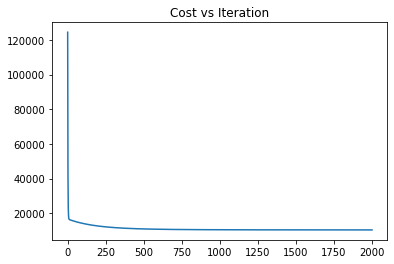

In [10]:
# plot cost vs iterations 
plt.plot(costs)
plt.title("Cost vs Iteration")
# note gradient descent return costs for all iterations

In [11]:
# print evaluation metric for test set while 
evaluation_metric(y_hat(X_test,theta),y_test)
# changing max_iteration from 500 to 2000
# Note the best value of evaluation metric you get

5154.392449762989

In [12]:
# compare your solution with scikit-learn library
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [13]:
# Create linear regression object


In [14]:
# Train the model using the training sets


In [16]:
# Predict on test set and print evaluation metric

predict=model.predict(X_test)

# How much does it differ by from 

